<a href="https://colab.research.google.com/github/ArchanaGajendra/Machine_Learning/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_heart = pd.read_csv('/content/drive/MyDrive/DATASETS/heart_2020_cleaned.csv')

In [ ]:

#### About Dataset
# Display the first 5 records of the dataframe
df_heart.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
print('No. of Records:',df_heart.shape[0])
print('No. of Features:',df_heart.shape[1])
print('Features:', df_heart.columns)

No. of Records: 319795
No. of Features: 18
Features: Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
#### Data Preprocessing
#Checking for missing values
df_heart.isnull().sum()


,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
for i in df_heart.columns:
    if df_heart[i].dtype== "object":
        print(i,df_heart[i].unique())

HeartDisease ['No' 'Yes']
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
SkinCancer ['Yes' 'No']


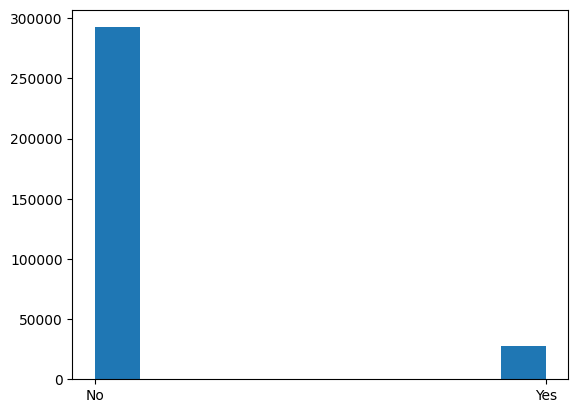

In [ ]:
plt.hist(df_heart["HeartDisease"])
plt.show()

In [ ]:
y = df_heart['HeartDisease']
X = df_heart.drop('HeartDisease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0, stratify = y)


In [ ]:
# Size of the Train and Test dataset
print('Train Set:',X_train.shape[0])
print('Test Set',X_test.shape[0])

Train Set: 255836
Test Set 63959


In [ ]:
# ... (your existing code) ...

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X,
                  columns=['Smoking', 'AlcoholDrinking', 'Stroke',
                           'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                           'Diabetic', 'PhysicalActivity', 'GenHealth',
                           'Asthma', 'KidneyDisease', 'SkinCancer'],
                  drop_first=True)  # Avoid multicollinearity

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Fit the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2)
rf.fit(X_train, y_train)

# ... (rest of your code) ...

RandomForestClassifier(max_depth=2)

In [ ]:
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
#### Prediction of Test dataset
y_pred = rf.predict(X_test)
# Print the predicted values
print("Prediction for test set:",y_pred)


Prediction for test set: ['No' 'No' 'No' ... 'No' 'No' 'No']


In [ ]:
# Actual value and the predicted value
test = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
test.head()


,Actual value,Predicted value
319736,No,No
228869,No,No
236091,No,No
50120,No,No
291867,No,No


              precision    recall  f1-score   support

          No       0.91      1.00      0.96     58484
         Yes       0.00      0.00      0.00      5475

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.91      0.87     63959



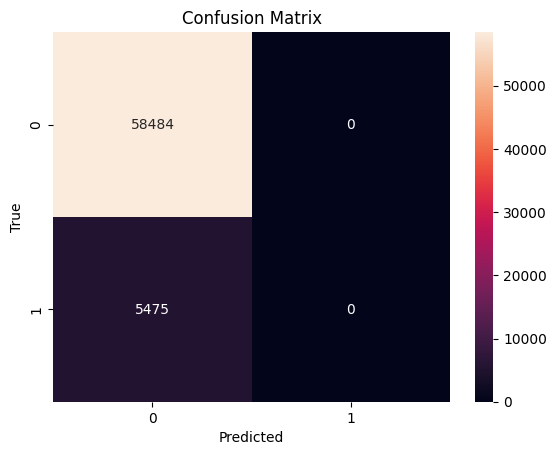

In [ ]:
### Evaluation of the model

matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))


In [ ]:
##True Negatives (Top-left: 58484): Correctly predicted "No" class.
##False Positives (Top-right: 0): Misclassified "No" as "Yes."
##False Negatives (Bottom-left: 5475): Misclassified "Yes" as "No."
##True Positives (Bottom-right: 0): Correctly predicted "Yes" class.

In [ ]:
# Create the new record as a dictionary
new_rec_dict = {
    'BMI': 36.25,
    'Smoking': 'Yes',
    'AlcoholDrinking': 'Yes',
    'Stroke': 'Yes',
    'PhysicalHealth': 1,
    'MentalHealth': 1,
    'DiffWalking': 'Yes',
    'Sex': 'Female',
    'AgeCategory': '50-54',
    'Race': 'Asian',
    'Diabetic': 'Yes',
    'PhysicalActivity': 'No',
    'GenHealth': 'Poor',
    'SleepTime': 7,
    'Asthma': 'Yes',
    'KidneyDisease': 'Yes',
    'SkinCancer': 'No'
}

# Convert to DataFrame
new_rec_df = pd.DataFrame([new_rec_dict])

# One-hot encode the new record
new_rec_encoded = pd.get_dummies(new_rec_df,
                                 columns=['Smoking', 'AlcoholDrinking', 'Stroke',
                                          'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                                          'Diabetic', 'PhysicalActivity', 'GenHealth',
                                          'Asthma', 'KidneyDisease', 'SkinCancer'],
                                 drop_first=True)

# Align columns with training data
missing_cols = set(X_train.columns) - set(new_rec_encoded.columns)
for col in missing_cols:
    new_rec_encoded[col] = 0
new_rec_encoded = new_rec_encoded[X_train.columns]

# Make prediction
prediction = rf.predict(new_rec_encoded)
print('Prediction for the new record:', prediction)

Prediction for the new record: ['No']


In [ ]:
print('Actual value:',y_test)

Actual value: 319736     No
228869     No
236091     No
50120      No
291867     No
         ... 
207124     No
248595    Yes
291348     No
146445     No
158667     No
Name: HeartDisease, Length: 63959, dtype: object


In [ ]:
print('predicted value:',y_pred)

predicted value: ['No' 'No' 'No' ... 'No' 'No' 'No']
